In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.applications.inception_v3 import preprocess_input

(1, 1000, 689, 3)
True
True
True
True
True
True
True
True
True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


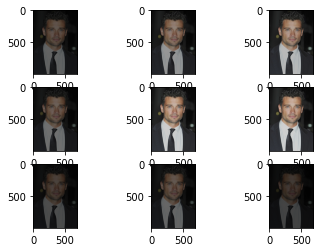

In [92]:
import cv2
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image




FILENAME = 'welling11.jpg'
FILENAMEEXTENSION = -6
FOLDERNAME = FILENAME[:FILENAMEEXTENSION]


for i, file in enumerate(glob.glob('dataset/*.jpg')):
  
  img = load_img(file)
  # convert to numpy array
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  print(samples.shape)
  # create image data augmentation generator
  datagen = [ImageDataGenerator(width_shift_range=[-200,200]), ImageDataGenerator(height_shift_range=0.5), ImageDataGenerator(horizontal_flip=True), ImageDataGenerator(rotation_range=90), ImageDataGenerator(brightness_range=[0.2,1.0]) ]


  for idx, gen in enumerate(datagen):
    # prepare iterator
    # print(idx, gen)
    it = gen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
      # define subplot
      pyplot.subplot(330 + 1 + i)
      # generate batch of images
      batch = it.next()
      # convert to unsigned integers for viewing
      image = batch[0].astype('uint8')
      # plot raw pixel data
      pyplot.imshow(image)
      print(cv2.imwrite('supermen/'+FOLDERNAME+'/'+FILENAME[:-4]+str(i)+str(idx)+'.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR)))

In [71]:
it = gen.flow(samples, batch_size=1)

In [88]:
FILENAME[:-4]

'welling11'

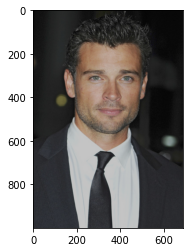

In [87]:
pyplot.imshow(it.next()[0].astype('uint8'))

# Setting up the training generators

The training and validation generators are created. THese supply images to the model one by one.
We split it into 80% training 20% validation set, see validtion_split. The classes are split into categorical mode to show that they are separate classes. Then the image size is set, for this InceptionV3 model, the INPUT Image Size has to be 299 x 299 x 3, i.e. three channels for color, also rescale the images to have pixel values from 0 to 255, this is important. Give it the training_dataset directory that we made using the augmented_Model.py script.




In [44]:

train_data_dir = '/content/supermen'
batch_size = 16
img_height = 299
img_width = 299
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 108 images belonging to 4 classes.
Found 27 images belonging to 4 classes.


In [ ]:
train_generator.next()

In [ ]:
import pandas as pd
pd.Series(train_generator.classes)

In [12]:
# CREATE MODEL FROM INCEPTION_V3
# base_model loads the InceptionV3 model
# predictions add a new Dense layer with 5 neurons for our five classes
#then the model is create using base_model and predictions as its output

base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# LOAD SAVED MODEL
# to load a saved model uncomment this and run it 
# When you want to run the saved model, comment the above line where model variable is declared

# model = keras.models.load_model('mymodel')
# model.summary()

In [ ]:
# Layers are set to not trainable
# we set original InceptionV3 model to freeze, so that out Dense layer has a chance to get initialised

for layer in model.layers:
    layer.trainable = False


model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# start fitting the model to get Dense layer initialsed
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

In [ ]:
# Print layer names and then set the last layer few layers to unfreeze so we can train them to classify

for i, layer in enumerate(model.layers):
    print(i, layer.name)

for layer in model.layers[:249]:
    layer.trainable = False

for layer in model.layers[249:]:
    layer.trainable = True
    print(layer.name)
 


In [47]:
# Compile our Model to use Stochastic Gradient Descent Algorithm with a very low Learning Rate so it can stop Underfitting

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy')

model.fit_generator(
    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
6/6 [==============================] - 6s 353ms/step - loss: 0.1018 - val_loss: 0.1886
Epoch 2/100
6/6 [==============================] - 1s 140ms/step - loss: 0.0945 - val_loss: 0.1001
Epoch 3/100
6/6 [==============================] - 1s 140ms/step - loss: 0.0718 - val_loss: 0.0693
Epoch 4/100
6/6 [==============================] - 1s 141ms/step - loss: 0.0497 - val_loss: 0.2084
Epoch 5/100
6/6 [==============================] - 1s 143ms/step - loss: 0.0633 - val_loss: 0.1457
Epoch 6/100
6/6 [==============================] - 1s 146ms/step - loss: 0.0712 - val_loss: 0.0878
Epoch 7/100
6/6 [==============================] - 1s 148ms/step - loss: 0.0394 - val_loss: 0.0923
Epoch 8/100
6/6 [==============================] - 1s 148ms/step - loss: 0.0704 - val_loss: 0.1190
Epoch 9/100
6/6 [==============================] - 1s 149ms/step - loss: 0.0481 - val_loss: 0.0636
Epoch 10/100
6/6 [==============================] - 1s 150ms/step - loss: 0.0751 - val_loss: 0.0320
Epoch 11/

In [33]:
#Save the model as retrained_model
model.save('retrained_model_sun_15_aug')

INFO:tensorflow:Assets written to: retrained_model_sun_15_aug/assets


# IGNORE THIS CELL

In [ ]:
# test_data_dir = 'test'


# test_datagen = ImageDataGenerator(
#     rescale=1./255,
#     ) # set validation split




# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(img_height, img_width),
#     batch_size=1,
#     class_mode='categorical',
#     subset='validation') # set as test data
# unseen_img = '.jpeg'
# img = image.load_img(unseen_img, target_size=(img_height, img_width))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# y_prob = model.predict(x)
# list(train_generator.class_indices)[np.argmax(y_prob)]

# Test the model on test set

input images into the test folder as is done in supermen directory
and run this block
It outputs what the Predicted Result is Versus the Actual Name

N.B I need to code it to give accrucy values, for now the accuracy is around 30%

In [20]:
import glob


for filepath in glob.iglob('/content/'):
    
    img = image.load_img(filepath, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    y_prob = model.predict(x)
    print(list(train_generator.class_indices)[np.argmax(y_prob)],'--------', filepath[14:])


In [58]:
import glob
filepath = '1.jpg'
img = image.load_img(filepath, target_size=(img_height, img_width))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

np.argmax(model.predict(x))


3

In [59]:
# To print the labels in the model
train_generator.class_indices

{'.ipynb_checkpoints': 0, 'cavill': 1, 'routh': 2, 'welling': 3}